In [132]:
# homework instructions: https://wustl.bootcampcontent.com/Data-Viz-BootCamp-MW/DataAnalytics/tree/master/Week%2011-Advanced-Data-Storage-and-Retrieval/HW%20Instructions
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [133]:
import numpy as np
import pandas as pd

In [134]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [135]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [136]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [137]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [138]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [139]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [140]:
# Create our session (link) from Python to the DB
session = Session(engine)

##Exploratory Climate Analysis

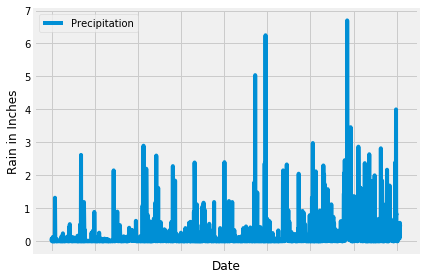

In [151]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#engine.execute('SELECT * FROM measurement').filter(measurement.date > date)
#inspector = inspect(engine)
#columns = inspector.get_columns('Measurement')
#for c in columns:
#    print(c['name'], c["type"])
#id INTEGER
#station TEXT
#date TEXT
#prcp FLOAT
#tobs FLOAT
#
#engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()
#
#[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
#(2, 'USC00519397', '2010-01-02', 0.0, 63.0),
#(3, 'USC00519397', '2010-01-03', 0.0, 74.0),
#(4, 'USC00519397', '2010-01-04', 0.0, 76.0),
#(5, 'USC00519397', '2010-01-06', None, 73.0),
#(6, 'USC00519397', '2010-01-07', 0.06, 70.0),
#(7, 'USC00519397', '2010-01-08', 0.0, 64.0),
#(8, 'USC00519397', '2010-01-09', 0.0, 68.0),
#(9, 'USC00519397', '2010-01-10', 0.0, 73.0),
#(10, 'USC00519397', '2010-01-11', 0.01, 64.0)]
#
#inspector = inspect(engine)
#columns = inspector.get_columns('station')
#for c in columns:
#    print(c['name'], c["type"])
#id INTEGER
#station TEXT
#latitude FLOAT
#longitude FLOAT
#elevation FLOAT
#
#engine.execute('SELECT * FROM station LIMIT 10').fetchall()
#[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
#(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
#(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
#(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
#(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
#(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
#(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
#(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
#(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]
#

# Calculate the date 1 year ago from today

DataYear = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Query for the date and precipitation for the last year
precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= DataYear).all()

#conn = engine.connect()    
#data = pd.read_sql_query(precip,session.bind)

#df = pd.read_sql(session.query(Complaint).filter(Complaint.id == 2).statement,session.bind)
#df = pd.read_sql(precip, session)
#df

ptps = list(precip)

# Save the query results as a Pandas DataFrame and set the index to the date column
data = pd.DataFrame(ptps)
cleandata = data.dropna()
cleandata.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
cleandata.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.legend(["Precipitation"])
plt.tight_layout()
plt.show()



In [142]:
# Use Pandas to calcualte the summary statistics for the precipitation data
cleandata['prcp'].describe()


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [143]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [144]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()


[('USC00519281', 2772),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [145]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

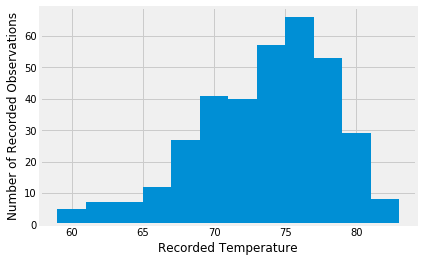

In [146]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
DataYear = dt.date(2017, 8, 23) - dt.timedelta(days=365)
squery = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= DataYear).order_by(Measurement.date).all()

#tobs
%matplotlib inline
data = pd.DataFrame(squery)
plt.hist(data['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.show()



In [177]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [178]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates. 8-23-2017 
start_date = dt.date(2016, 8, 23)
end_date = dt.date(2017, 8, 23)
yearData = dt.timedelta(days=365)
tempAvgyearData = (calc_temps((start_date-yearData), (end_date-yearData)))
print(tempAvgyearData)

[(56.0, 74.43899317406144, 86.0)]
